In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders
os.listdir(extract_path)


['Dataset - train+val+test']

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

Data Preparation

In [4]:
training_set = image_dataset_from_directory(
    "/content/dataset/Dataset - train+val+test/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 76515 files belonging to 4 classes.


In [5]:
validation_set = image_dataset_from_directory(
    "/content/dataset/Dataset - train+val+test/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 21861 files belonging to 4 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [7]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [10]:
INPUT_SHAPE = (224, 224, 3)

In [11]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,

)

22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model =tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [15]:
model.add(mobnet)

In [16]:
model.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [17]:
metrics_list=["accuracy",tf.keras.metrics.F1Score()]

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=metrics_list)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [24]:
training_histroy=model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 401s 142ms/step - accuracy: 0.8528 - f1_score: 0.6310 - loss: 1.2215 - val_accuracy: 0.9001 - val_f1_score: 0.6978 - val_loss: 0.9626
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 304s 127ms/step - accuracy: 0.8992 - f1_score: 0.6957 - loss: 0.8855 - val_accuracy: 0.9017 - val_f1_score: 0.6998 - val_loss: 0.7142
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 274s 114ms/step - accuracy: 0.9077 - f1_score: 0.7447 - loss: 0.6651 - val_accuracy: 0.9426 - val_f1_score: 0.9055 - val_loss: 0.5581
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 348s 125ms/step - accuracy: 0.9608 - f1_score: 0.9315 - loss: 0.5092 - val_accuracy: 0.9622 - val_f1_score: 0.9358 - val_loss: 0.4242
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 295s 114ms/step - accuracy: 0.9652 - f1_score: 0.9395 - loss: 0.3944 - val_accuracy: 0.9661 - val_f1_score: 0.9415 - val_loss: 0.3315
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 349s 125ms/step - accuracy: 0.9711 - f1_score: 0.9496 - loss: 0.3038 - val_acc

In [29]:
model.save("./Trained_Eye_disease_model.keras")



In [30]:
training_histroy.history

{'accuracy': [0.8815395832061768,
  0.8975887298583984,
  0.9263935089111328,
  0.9596288204193115,
  0.9649350047111511,
  0.9698490500450134,
  0.9740835428237915,
  0.9779389500617981,
  0.980879545211792,
  0.9838070869445801,
  0.9860419631004333,
  0.987584114074707,
  0.9881591796875,
  0.9897797703742981,
  0.9906162023544312],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([8.8670129e-01, 8.5064638e-01, 6.4174476e-04, 9.5815253e-01],
        dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.89058244, 0.9135694 , 0.        , 0.9763287 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92141604, 0.9290411 , 0.53469867, 0.9792112 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9655409, 0.9375884, 0.8368702, 0.9813182], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9685022, 0.9473358, 0.8562798, 0.9852338], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=flo

In [42]:
import pickle

with open('/content/drive/MyDrive/Training_history.pkl', 'wb') as f:
    pickle.dump(training_histroy.history, f)

In [38]:
model.save('/content/drive/MyDrive/Trained_Eye_disease_model.keras')
# or .h5 if using that format
model.save('/content/drive/MyDrive/Trained_Eye_disease_model.h5')


In [36]:
from google.colab import files
# files.download("Trained_Eye_disease_model.keras")  # Or .h5
# files.download("Trained_Eye_disease_model.h5")
files.download("Training_history.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
#reloading history from pickle file
import pickle
with open("/content/drive/MyDrive/Training_history.pkl","rb") as f:
  load_history =pickle.load(f)
print(load_history)

{'accuracy': [0.8815395832061768, 0.8975887298583984, 0.9263935089111328, 0.9596288204193115, 0.9649350047111511, 0.9698490500450134, 0.9740835428237915, 0.9779389500617981, 0.980879545211792, 0.9838070869445801, 0.9860419631004333, 0.987584114074707, 0.9881591796875, 0.9897797703742981, 0.9906162023544312], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([8.8670129e-01, 8.5064638e-01, 6.4174476e-04, 9.5815253e-01],
      dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.89058244, 0.9135694 , 0.        , 0.9763287 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92141604, 0.9290411 , 0.53469867, 0.9792112 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9655409, 0.9375884, 0.8368702, 0.9813182], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9685022, 0.9473358, 0.8562798, 0.9852338], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97346586, 0.95797074, 

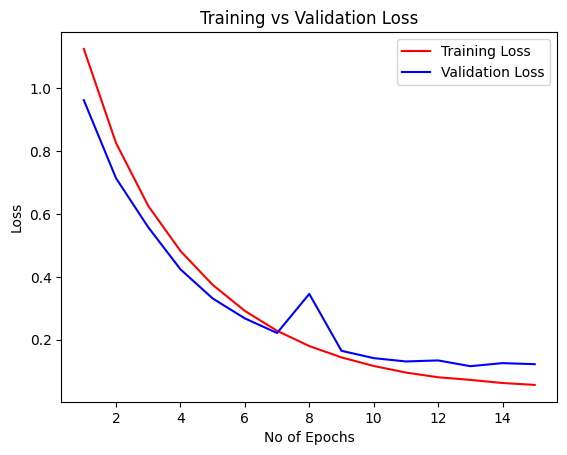

In [45]:
#Loss Validation
epochs = [i for i in range(1, 16)]

plt.plot(epochs, load_history['loss'], color='red', label='Training Loss')
plt.plot(epochs, load_history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

Model Evaluation

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,485,510 (62.89 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 10,974,074 (41.86 MB)

In [61]:
test_set = image_dataset_from_directory(
    "/content/dataset/Dataset - train+val+test/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 10933 files belonging to 4 classes.


In [62]:
test_loss,test_acc,test_f1_score=model.evaluate(test_set)


342/342 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - accuracy: 0.9740 - f1_score: 0.6400 - loss: 0.1087


In [63]:
test_loss,test_acc,test_f1_score

(0.1211090162396431,
 0.9711881279945374,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97335273, 0.9596529 , 0.8802291 , 0.9876374 ], dtype=float32)>)

In [64]:
true_categories =tf.concat([y for x,y in test_set],axis=0)
Y_true=tf.argmax(true_categories,axis=1)

In [65]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [66]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [67]:
# Computing Predicted labels using test_set
predicted_categories =model.predict(test_set)
predicted_categories

342/342 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step


array([[0.98532385, 0.00423673, 0.00600051, 0.00443887],
       [0.98532385, 0.00423673, 0.00600052, 0.00443887],
       [0.98532385, 0.00423673, 0.00600051, 0.00443887],
       ...,
       [0.00273265, 0.00381155, 0.0047801 , 0.9886757 ],
       [0.00273265, 0.00381155, 0.0047801 , 0.9886757 ],
       [0.00273265, 0.00381155, 0.0047801 , 0.9886757 ]], dtype=float32)

In [69]:
Y_Pred=tf.argmax(predicted_categories,axis=1)
Y_Pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

Classification Report



In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_Pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3746
           1       0.97      0.95      0.96      1161
           2       0.90      0.87      0.88       887
           3       0.99      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.95      0.95      0.95     10933
weighted avg       0.97      0.97      0.97     10933



In [71]:
from sklearn.metrics import confusion_matrix
cs=confusion_matrix(Y_true,Y_Pred)
cs

array([[3671,   15,   55,    5],
       [  25, 1106,    5,   25],
       [  85,    3,  768,   31],
       [  16,   20,   30, 5073]])

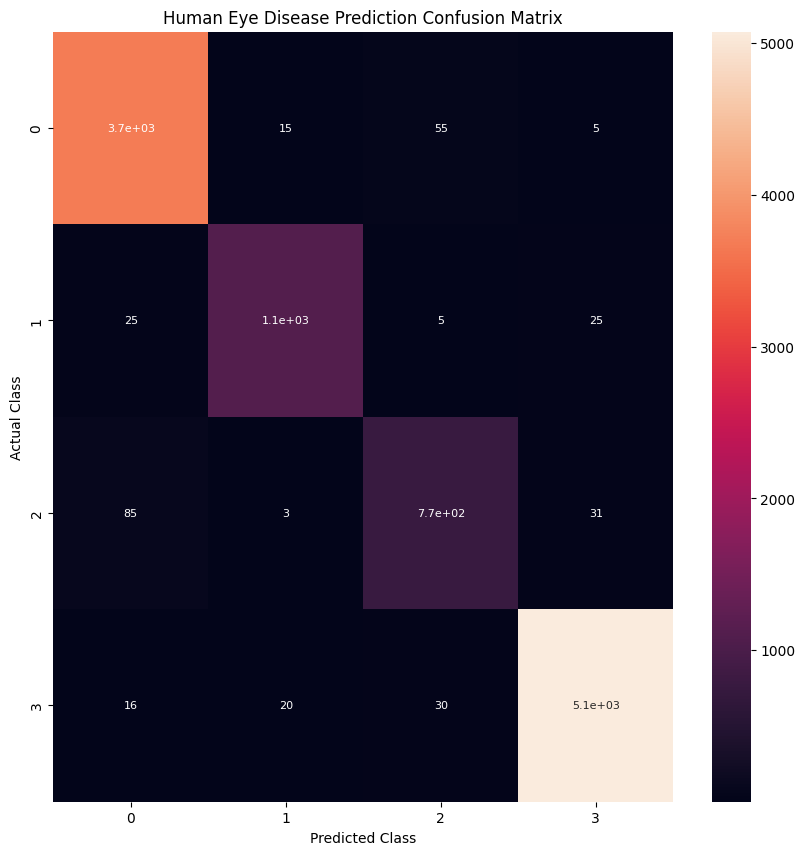

In [74]:
plt.figure(figsize=(10, 10))
sns.heatmap(cs, annot=True, annot_kws={"size": 8})
plt.xlabel("Predicted Class", fontsize=10)
plt.ylabel("Actual Class", fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix", fontsize=12)
plt.show()


In [77]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
import os
image_path = "/content/dataset/Dataset - train+val+test/test/DRUSEN/DRUSEN-1001666-7.jpeg"
img =tf.keras.utils.load_img(image_path,target_size=(224,224))
x=tf.keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [78]:
x.shape

(1, 224, 224, 3)

In [79]:
pred=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [80]:
pred


array([[0.04166142, 0.0077631 , 0.9275153 , 0.02306014]], dtype=float32)

In [84]:
class_name=['CNV','DME','DRUSEN','NORMAL']
result_index=np.argmax(pred)
print("Model Prediction:",class_name[result_index])

Model Prediction: DRUSEN
